# Procesamiento en el dominio epacial
###Ezequiel Vijande
###Lucero Guadalupe Fernandez

## Librerias importadas

In [4]:
%pip install wget

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import wget

## 1– Explicar que diferencia hay entre el brillo y contraste. Mostrar ejemplos.

El brillo de una imagen hace referencia al valor medio de la intensidad de la misma. Mientras que el contraste se refiere a la diferencia entre el vlor maximo y el valor minimo en la imagen, por lo que hace referencia al rango dinamimco de la misma.

In [14]:
mmamogram_file = wget.download("https://tinyurl.com/y45x2x2r")

ValueError: ignored

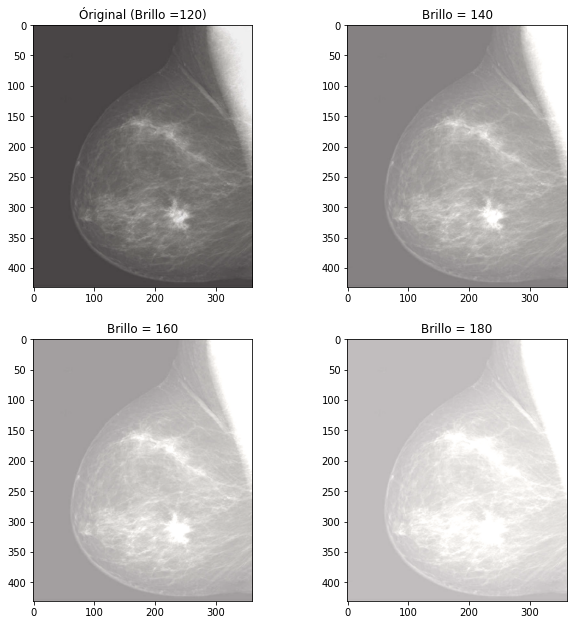


El codigo anterior muestra la imagen de una mamograma con distintos brillos.


In [50]:
def NegativeTransform(img):
  return 255-img
def LogTransform(img,L=256):
  c = (L-1)/np.log2(L)
  return  c*(np.log2(img)) 
def ChangeBrightnessAndContrast(img,desired_brightness=None, desired_contrast=None):
  float_img = img.astype(float)
  con_mod_img = float_img.copy()
  if (desired_contrast != None):
    contrast_factor = float( (259*(desired_contrast+255)) / (255 * (259 - desired_contrast)) )
    for i in range(0,3):
      con_mod_img   = (contrast_factor * (con_mod_img - 128) ) + 128
    con_mod_img[con_mod_img<0] = 0
    con_mod_img[con_mod_img>255] = 255
  if (desired_brightness != None):
    br_mod_img = con_mod_img + (desired_brightness - con_mod_img.mean())
  else:
    br_mod_img = con_mod_img
  result = br_mod_img.astype(int)
  result[result<0] = 0
  result[result>255] = 255
  return result
  

#Original
img = cv2.imread(mmamogram_file)
fig_img = plt.figure(figsize=(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
fig_img.add_subplot(2,2,1)
plt.title('Óriginal (Brillo =120)')
plt.imshow(img)

initial_brightness = img.mean()
for i in range(2,5):
  fig_img.add_subplot(2,2,i)
  plt.title('Brillo = ' + str(int(initial_brightness + i*20)))
  plt.imshow( ChangeBrightnessAndContrast(img,desired_brightness=initial_brightness + i*30) )



plt.show()
print("\nEl codigo anterior muestra la imagen de una mamograma con distintos brillos.")


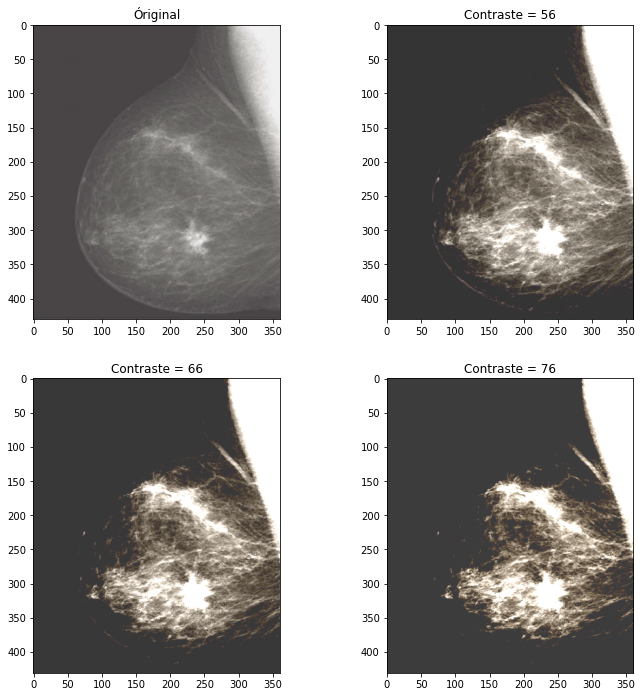

En este caso se aplica una transformacion logaritmica sobre la imagen.
La misma expande a un rango mayor los valores mas oscuros y comprime a un rango menor los mas brillantes.
Esta transformacion aumenta el brillo de la imagen y tambien disminuye el contraste de a misma


In [61]:
#Original
fig_img = plt.figure(figsize=(9,9))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
fig_img.add_subplot(221)
plt.title('Óriginal')
plt.imshow(img)

initial_contrast = img.std()
for i in range(2,5):
  fig_img.add_subplot(2,2,i)
  plt.title('Contraste = ' + str(int(initial_contrast + i*10)))
  plt.imshow( ChangeBrightnessAndContrast(img,desired_brightness=initial_brightness, desired_contrast= initial_contrast + i*10) )

plt.show()
print("En este caso se aplica una transformacion logaritmica sobre la imagen.")
print("La misma expande a un rango mayor los valores mas oscuros y comprime a un rango menor los mas brillantes.")
print("Esta transformacion aumenta el brillo de la imagen y tambien disminuye el contraste de a misma")

## 2 – Escribir un código que modifique el brillo y contraste de una imagen

In [67]:
def PlotChangeInContrastAndBrigthness(img):
  initial_contrast = img.std() -50
  initial_brightness = img.mean() - 50
  fig_img = plt.figure(figsize=(9,9))
  plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
  for i in range(0,9):
    if (i<3):
      fig_img.add_subplot(3,3,i+1)
      plt.title('Brillo = '+str(int(initial_brightness))+' Contraste = ' + str(int(initial_contrast + i*50)))
      plt.imshow( ChangeBrightnessAndContrast(img,desired_brightness=initial_brightness, desired_contrast= initial_contrast + i*50) )
    elif ( i<6 ):
      fig_img.add_subplot(3,3,i+1)
      plt.title('Brillo = '+str(int(initial_brightness+i*50))+' Contraste = ' + str(int(initial_contrast)))
      plt.imshow( ChangeBrightnessAndContrast(img,initial_brightness+i*50 ))
    else:
      fig_img.add_subplot(3,3,i+1)
      plt.title('Brillo = '+str(int(initial_brightness+i*50))+' Contraste = ' + str(int(initial_contrast+i*50)))
      plt.imshow( ChangeBrightnessAndContrast(img,initial_brightness+i*50, desired_contrast= initial_contrast + i*50))
  plt.show()


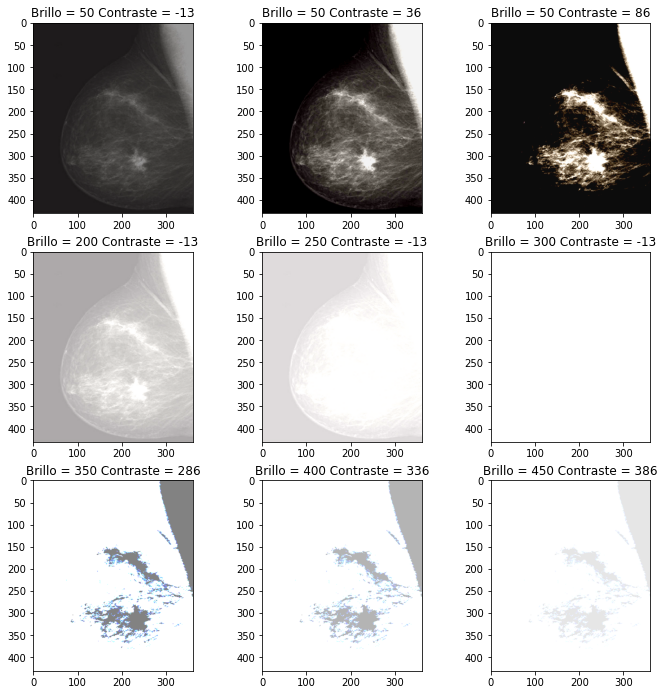

In [68]:
PlotChangeInContrastAndBrigthness(img)

In [ ]:
def GammaTransform(img,gamma=1,L=256):
  gamma_f = float(gamma)
  c= (L-1)**(1-gamma_f)
  return (c*(img**gamma_f)).astype(int)

In [ ]:
def PlotGammas(img, show=True):
  fig_img.add_subplot(nrows=1, ncols=4, index=1)
  plt.title('Original (gamma=1)')
  plt.imshow(img)
  for i in range(2,5):
    fig_img.add_subplot(nrows=1, ncols=4, index=1)
    gamma = 0.6/(2**(i-1))
  plt.title('Gamma='+str(gamma))
  plt.imshow(GammaTransform(img,gamma))

#Original
img2 = cv2.imread('Rodilla.PNG')
fig_img = plt.figure(figsize=(9,9))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
PlotGammas()
fig_img.add_subplot(121)
plt.title('Original')
plt.imshow(img2)

fig_img.add_subplot(122)
plt.title('Gamma')
plt.imshow(GammaTransform(img,gamma=3))

plt.show()

In [ ]:
#Original
img = cv2.imread('bit.jpeg')
fig_img = plt.figure(figsize=(7,7))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)


def bit_slicing_n(img, n):
  new_img = np.unpackbits(np.copy(img))
  new_img = np.reshape(new_img, (img.shape[0],img.shape[1],3,-1))
  print(np.shape(new_img))
  
  for i in range(img.shape[0]):
    print(new_img[new_img[1]])
    new_img[new_img[n] == 1] = 255
    new_img[new_img[n] == 0] = 0
    #new_img[np.logical_and(new_img > 2**n-1, new_img < 2**(n+1) )] = 255
    #new_img[((new_img > 2**n-1).all() and (new_img < 2**(n+1)).all())] = 255
  return np.packbits(new_img)

new_img = bit_slicing_n(img, 7)

fig_img.add_subplot(1,2,1)
plt.title("Original")
plt.axis('off')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

fig_img.add_subplot(1,2,2)
plt.title("bit slicing")
plt.axis('off')
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)

plt.show()